In [24]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: 

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [26]:
# Load MATLAB file
normal_bearings_data = loadmat('/content/drive/MyDrive/ML_Miniproject2/97.mat')
faulty_bearings_data1 = loadmat('/content/drive/MyDrive/ML_Miniproject2/105.mat')
faulty_bearings_data2 = loadmat('/content/drive/MyDrive/ML_Miniproject2/118.mat')
faulty_bearings_data3 = loadmat('/content/drive/MyDrive/ML_Miniproject2/130.mat')

normal_data = normal_bearings_data['X097_DE_time']
fault_data1 = faulty_bearings_data1['X105_DE_time']
fault_data2 = faulty_bearings_data2['X118_DE_time']
fault_data3 = faulty_bearings_data3['X130_DE_time']

def select_samples(data, M, N, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    samples = []
    for _ in range(M):
        start_index = np.random.randint(0, len(data) - N)
        sample = data[start_index:start_index + N]
        samples.append(sample)
    return np.array(samples)

M = 200
N = 300
normal_samples = select_samples(normal_data, M, N, 64)
faulty_samples1 = select_samples(fault_data1, M, N, 64)
faulty_samples2 = select_samples(fault_data2, M, N, 64)
faulty_samples3 = select_samples(fault_data3, M, N, 64)

labels_normal = np.zeros(M)
labels_faulty1 = np.ones(M)
labels_faulty2 = 2*np.ones(M)
labels_faulty3 = 3*np.ones(M)

normal_samples_flat = normal_samples.reshape(M, -1)
faulty_samples_flat1 = faulty_samples1.reshape(M, -1)
faulty_samples_flat2 = faulty_samples2.reshape(M, -1)
faulty_samples_flat3 = faulty_samples3.reshape(M, -1)

data_combined = np.vstack((normal_samples_flat, faulty_samples_flat1, faulty_samples_flat2, faulty_samples_flat3))

labels_combined = np.concatenate((labels_normal, labels_faulty1, labels_faulty2, labels_faulty3))

df = pd.DataFrame(data_combined)
df['label'] = labels_combined

In [27]:
df

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,label
0,-0.155836,-0.184833,-0.159591,-0.107437,-0.046313,0.031084,0.071972,0.105351,0.100344,0.077188,...,-0.071764,-0.040889,-0.007302,0.017941,0.015229,-0.024617,-0.070303,-0.099927,-0.097632,0.0
1,0.122666,0.165849,0.162929,0.141650,0.101596,0.061124,0.066131,0.065922,0.067800,0.048399,...,0.071346,0.124752,0.131845,0.097841,0.027120,-0.013769,-0.029415,-0.023991,-0.021279,0.0
2,0.032961,0.076979,0.113487,0.126421,0.098466,0.053614,0.018775,0.006676,0.016272,0.008345,...,-0.003964,0.023991,0.070303,0.081151,0.054240,0.017524,-0.010639,-0.001252,0.015229,0.0
3,0.049442,0.079691,0.087618,0.060707,0.011474,-0.012100,0.010014,0.026911,0.035673,0.025034,...,-0.081151,-0.041723,-0.014603,-0.015438,-0.004590,0.031084,0.084072,0.113278,0.120371,0.0
4,0.009388,0.015855,0.034422,0.058412,0.049859,0.042975,0.067591,0.098884,0.125795,0.103056,...,-0.069678,-0.073224,-0.035673,0.015855,0.063002,0.102013,0.129342,0.141024,0.136434,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-0.226597,0.600198,-0.131572,0.024365,0.112892,0.091370,-0.239998,-0.034517,0.310657,-0.266394,...,0.126293,0.157968,-0.030863,-0.034517,0.133197,0.013807,0.017462,-0.007716,0.025990,3.0
796,-0.019086,-0.087715,0.119390,0.091776,-0.133603,0.064568,0.307408,-0.035736,-0.222536,0.151065,...,-0.108832,0.361824,-0.127105,-0.216851,0.336647,0.021929,-0.203450,0.280201,0.245683,3.0
797,0.187206,-0.230658,-0.091370,0.412991,0.296444,-0.127512,-0.084060,0.117765,0.156750,0.000406,...,0.056040,0.508016,-0.177866,-0.335429,0.178679,0.439793,-0.233500,-0.190049,0.329743,3.0
798,-0.177054,-0.276140,0.011777,0.020304,-0.226597,0.424362,0.591670,-1.019687,-0.598573,2.193280,...,0.074720,-0.053604,-0.265175,0.079593,0.325276,-0.215633,-0.463346,0.118578,0.229034,3.0


In [28]:
def standard_deviation(x):
    return np.sqrt(np.sum((x - np.mean(x))**2) / len(x))

def peak(x):
    return np.max(np.abs(x))

def skewness(x):
    return np.sum((x - np.mean(x))**3) / (len(x) * standard_deviation(x)**3)

def kurtosis(x):
    return np.sum((x - np.mean(x))**4) / (len(x) * standard_deviation(x)**4)

def crest_factor(x):
    return peak(x) / np.sqrt(np.mean(x**2))

def clearance_factor(x):
    return peak(x) / np.mean(np.sqrt(np.abs(x)))

def peak_to_peak(x):
    return np.max(x) - np.min(x)

def shape_factor(x):
    return np.sqrt(np.mean(x**2)) / np.mean(np.abs(x))

def impact_factor(x):
    return peak(x) / np.mean(np.abs(x))

def square_mean_root(x):
    return np.sqrt(np.mean(np.sqrt(np.abs(x))))

def mean(x):
    return np.mean(x)

def absolute_mean(x):
    return np.mean(np.abs(x))

def root_mean_square(x):
    return np.sqrt(np.mean(x**2))

def impulse_factor(x):
    return peak(x) / root_mean_square(x)

feature_functions = {
    'Standard Deviation': standard_deviation,
    'Peak': peak,
    'Skewness': skewness,
    'Kurtosis': kurtosis,
    'Crest Factor': crest_factor,
    'Clearance Factor': clearance_factor,
    'Peak to Peak': peak_to_peak,
    'Shape Factor': shape_factor,
    'Impact Factor': impact_factor,
    'Square Mean Root': square_mean_root,
    'Mean': mean,
    'Absolute Mean': absolute_mean,
    'Root Mean Square': root_mean_square,
    'Impulse Factor': impulse_factor,
}


In [29]:
data_features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

extracted_features_df = pd.DataFrame()

for name, func in feature_functions.items():
    extracted_features_df[name] = data_features.apply(func, axis=1)

extracted_features_df['label'] = labels

In [30]:
extracted_features_df

,Standard Deviation,Peak,Skewness,Kurtosis,Crest Factor,Clearance Factor,Peak to Peak,Shape Factor,Impact Factor,Square Mean Root,Mean,Absolute Mean,Root Mean Square,Impulse Factor,label
0,0.082875,0.202148,0.030082,2.239026,2.422692,0.822638,0.386982,1.198659,2.903980,0.495713,0.009688,0.069611,0.083440,2.422692,0.0
1,0.075542,0.198810,-0.233975,2.636864,2.558892,0.852953,0.380723,1.226810,3.139274,0.482789,0.018159,0.063330,0.077694,2.558892,0.0
2,0.069845,0.172525,-0.345102,2.790606,2.397219,0.776782,0.338374,1.239060,2.970297,0.471277,0.017355,0.058083,0.071969,2.397219,0.0
3,0.077919,0.243871,-0.064725,3.210181,3.075356,1.050382,0.476060,1.253827,3.855965,0.481844,0.014728,0.063245,0.079299,3.075356,0.0
4,0.073374,0.178783,-0.145831,2.454102,2.408322,0.786682,0.334410,1.226038,2.952695,0.476721,0.011280,0.060549,0.074236,2.408322,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.609554,2.978654,-0.119518,8.766335,4.883501,6.219620,5.563403,1.771710,8.652145,0.692035,0.021753,0.344268,0.609942,4.883501,3.0
796,0.632221,2.434090,0.087187,6.808148,3.847327,4.572275,4.674071,1.617976,6.224881,0.729629,0.023847,0.391026,0.632671,3.847327,3.0
797,0.707071,2.608302,0.144037,6.007329,3.687545,4.666300,4.998535,1.587292,5.853210,0.747640,0.019064,0.445619,0.707328,3.687545,3.0
798,0.745096,2.861701,0.073547,6.231984,3.837001,4.865896,5.603200,1.562768,5.996341,0.766886,0.032781,0.477241,0.745817,3.837001,3.0


In [31]:
X = extracted_features_df.drop(columns=['label'])
y = extracted_features_df['label']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_rem, y_train, y_rem = train_test_split(X, y,
                                                  train_size=0.6, random_state=4, shuffle=True)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem,
                                                    test_size=0.5, random_state=4, shuffle=True)

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_normalized_data = scaler.fit_transform(X_train)
valid_normalized_data = scaler.transform(X_valid)
test_normalized_data = scaler.transform(X_test)

y_train = y_train.to_numpy()
y_valid = y_valid.to_numpy()
y_test = y_test.to_numpy()

In [34]:
## Activation Function
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


## Loss
def bce(y, y_hat):
    return np.mean(-(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)))

def mse(y, y_hat):
    return np.mean((y - y_hat)**2)

def categorical_cross_entropy(y, y_hat):
    return -np.mean(np.sum(y * np.log(y_hat), axis=1))


## Accuracy
def accuracy(y, y_hat, t=0.5):
    y_hat = np.where(y_hat < t, 0, 1)
    acc = np.sum(y == y_hat) / len(y)
    return acc

class MLP:
    def __init__(self, hidden_layer_sizes, hidden_activation='relu',
                 output_size=1, output_activation='sigmoid',
                 n_iter=1000, loss_fn=bce, eta=0.1, random_state=None):
        self.hidden_layer_sizes = hidden_layer_sizes
        self.hidden_activation = hidden_activation
        self.output_size = output_size
        self.output_activation = output_activation
        self.n_iter = n_iter
        self.loss_fn = loss_fn
        self.eta = eta
        self.random_state = random_state
        np.random.seed(self.random_state)  # Set random seed

    def _init_weights(self):
        self.ws, self.bs = [], []  # Weight and bias lists for each layer
        self.as_ = [None] * len(self.hidden_layer_sizes)  # Initialize as_ with None
        all_layers = [self.input_size] + self.hidden_layer_sizes + [self.output_size]  # All layer sizes
        num_layers = len(all_layers)
        for i in range(1, num_layers):
            w = np.random.randn(all_layers[i-1], all_layers[i])  # Randomly initialize weights
            b = np.random.randn(all_layers[i])  # Randomly initialize biases
            self.ws.append(w)
            self.bs.append(b)

    def fit(self, X, y, X_val=None, y_val=None):  # Add optional validation data
        n, self.input_size = X.shape
        self._init_weights()
        train_losses = []
        val_losses = []
        train_accs = []
        val_accs = []
        for _ in range(self.n_iter):
            y_hat = self.predict(X)
            loss = self.loss_fn(y, y_hat)
            self._gradient_descent(X, y, y_hat)
            train_losses.append(loss)
            train_acc = accuracy(y, y_hat)
            train_accs.append(train_acc)
            if X_val is not None and y_val is not None:
                val_loss = self.loss_fn(y_val, self.predict(X_val))
                val_losses.append(val_loss)
                val_acc = accuracy(y_val, self.predict(X_val))
                val_accs.append(val_acc)
                print(f"Train Loss: {loss:.4f} | Train Acc: {train_acc:.4f} | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")
            else:
                print(f"Train Loss: {loss:.4f} | Train Acc: {train_acc:.4f}")
        if X_val is not None and y_val is not None:
            self.plot_history(train_losses, val_losses, train_accs, val_accs)
        else:
            self.plot_history(train_losses, None, train_accs, None)


    def plot_history(self, train_losses, val_losses=None, train_accs=None, val_accs=None):
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.plot(train_losses, label='Training Loss')
        if val_losses is not None:
            plt.plot(val_losses, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training and Validation Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(train_accs, label='Training Accuracy')
        if val_accs is not None:
            plt.plot(val_accs, label='Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.legend()

        plt.show()
    def _gradient_descent(self, X, y, y_hat):
        delta = y_hat - y  # Compute difference between predicted and true values
        for j in range(len(self.ws)-1, 0, -1):
            w_grad = (self.as_[j-1].T @ delta) / len(y)  # Compute weight gradient
            b_grad = delta.mean(0)  # Compute bias gradient
            self.ws[j] -= self.eta * w_grad  # Update weights
            self.bs[j] -= self.eta * b_grad  # Update biases
            delta = (delta @ self.ws[j].T) * (self._activation_derivative(self.hs[j-1], self.hidden_activation))

    def predict(self, X):
        self.hs = []  # Hidden layer outputs
        self.as_ = []  # Activation function outputs
        for i, (w, b) in enumerate(zip(self.ws[:-1], self.bs[:-1])):
            a = self.as_[i-1].copy() if i>0 else X.copy()  # Input to the hidden layer
            self.hs.append(a @ w + b)  # Compute hidden layer output
            self.as_.append(self._activation_function(self.hs[i], self.hidden_activation))  # Apply activation function
        y = self._activation_function(self.as_[-1] @ self.ws[-1] + self.bs[-1], self.output_activation)  # Output layer activation
        return y

    def _activation_function(self, x, activation):
        if activation == 'relu':
            return np.maximum(0, x)  # ReLU activation
        elif activation == 'sigmoid':
            return 1 / (1 + np.exp(-x))  # Sigmoid activation
        else:
            raise ValueError("Invalid activation function.")

    def _activation_derivative(self, x, activation):
        if activation == 'relu':
            return np.where(x > 0, 1, 0)  # Derivative of ReLU activation
        elif activation == 'sigmoid':
            sigmoid = self._activation_function(x, 'sigmoid')
            return sigmoid * (1 - sigmoid)  # Derivative of Sigmoid activation
        else:
            raise ValueError("Invalid activation function.")


In [35]:
# mlp = MLP(hidden_layer_sizes=[6,4], hidden_activation='relu', output_size=4, output_activation='sigmoid', n_iter=2000, loss_fn=bce, eta=0.01, random_state=4)

mlp = MLP(hidden_layer_sizes=[16,12], hidden_activation='relu', output_size=4, output_activation='sigmoid', n_iter=2000, loss_fn=categorical_cross_entropy, eta=0.06, random_state=4)

# mlp = MLP(hidden_layer_sizes=[16,12], hidden_activation='sigmoid', output_size=4, output_activation='sigmoid', n_iter=2000, loss_fn=bce, eta=0.06, random_state=4)

# mlp = MLP(hidden_layer_sizes=[16,12], hidden_activation='relu', output_size=4, output_activation='sigmoid', n_iter=2000, loss_fn=mse, eta=0.06, random_state=4)

In [36]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

train_labels_onehot = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()
validate_labels_onehot = encoder.fit_transform(y_valid.reshape(-1, 1)).toarray()
test_labels_onehot = encoder.fit_transform(y_test.reshape(-1, 1)).toarray()

Train Loss: 9.2730 | Train Acc: 2.6583 | Val Loss: 2.7454 | Val Acc: 2.9062
Train Loss: 2.6910 | Train Acc: 2.9104 | Val Loss: 2.9696 | Val Acc: 3.3625
Train Loss: 2.8678 | Train Acc: 3.3563 | Val Loss: 1.6505 | Val Acc: 3.3563
Train Loss: 1.4628 | Train Acc: 3.3229 | Val Loss: 1.8084 | Val Acc: 3.4188
Train Loss: 1.5952 | Train Acc: 3.4083 | Val Loss: 1.1522 | Val Acc: 3.4688
Train Loss: 0.9609 | Train Acc: 3.4271 | Val Loss: 1.4145 | Val Acc: 3.4750
Train Loss: 1.2167 | Train Acc: 3.4917 | Val Loss: 0.9641 | Val Acc: 3.5187
Train Loss: 0.7836 | Train Acc: 3.4917 | Val Loss: 1.1126 | Val Acc: 3.5375
Train Loss: 0.9339 | Train Acc: 3.5354 | Val Loss: 0.8465 | Val Acc: 3.5312
Train Loss: 0.6814 | Train Acc: 3.5167 | Val Loss: 0.9132 | Val Acc: 3.5500
Train Loss: 0.7552 | Train Acc: 3.5438 | Val Loss: 0.7564 | Val Acc: 3.5500
Train Loss: 0.6082 | Train Acc: 3.5312 | Val Loss: 0.7757 | Val Acc: 3.5562
Train Loss: 0.6379 | Train Acc: 3.5604 | Val Loss: 0.6845 | Val Acc: 3.5750
Train Loss: 

<ipython-input-34-d5044df48fde>:123: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))  # Sigmoid activation
<ipython-input-34-d5044df48fde>:17: RuntimeWarning: divide by zero encountered in log
  return -np.mean(np.sum(y * np.log(y_hat), axis=1))
<ipython-input-34-d5044df48fde>:17: RuntimeWarning: invalid value encountered in multiply
  return -np.mean(np.sum(y * np.log(y_hat), axis=1))


Train Loss: nan | Train Acc: 2.9396 | Val Loss: nan | Val Acc: 2.3625
Train Loss: nan | Train Acc: 2.4167 | Val Loss: nan | Val Acc: 3.2437
Train Loss: nan | Train Acc: 3.1521 | Val Loss: nan | Val Acc: 3.2750
Train Loss: nan | Train Acc: 3.2271 | Val Loss: nan | Val Acc: 2.6875
Train Loss: nan | Train Acc: 2.7354 | Val Loss: nan | Val Acc: 3.3438
Train Loss: nan | Train Acc: 3.3021 | Val Loss: nan | Val Acc: 3.1938
Train Loss: nan | Train Acc: 3.1146 | Val Loss: nan | Val Acc: 2.8937
Train Loss: nan | Train Acc: 2.8854 | Val Loss: nan | Val Acc: 3.3000
Train Loss: nan | Train Acc: 3.1875 | Val Loss: nan | Val Acc: 3.2750
Train Loss: nan | Train Acc: 3.2333 | Val Loss: nan | Val Acc: 2.9438
Train Loss: nan | Train Acc: 2.9479 | Val Loss: nan | Val Acc: 3.2750
Train Loss: nan | Train Acc: 3.2333 | Val Loss: nan | Val Acc: 3.3625
Train Loss: nan | Train Acc: 3.3604 | Val Loss: nan | Val Acc: 3.5125
Train Loss: nan | Train Acc: 3.4500 | Val Loss: nan | Val Acc: 3.5125
Train Loss: nan | Tr

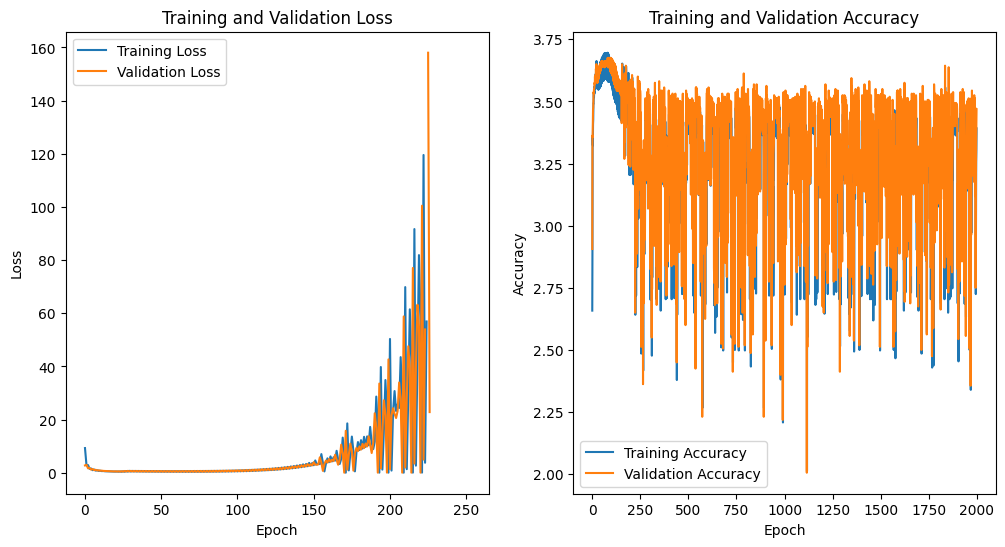

In [37]:
mlp.fit(train_normalized_data, train_labels_onehot, valid_normalized_data, validate_labels_onehot)

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_hat = mlp.predict(test_normalized_data)
y_hat = np.argmax(y_hat, axis=1)
test_labels_onehot = np.argmax(test_labels_onehot, axis=1)
model_report = classification_report(test_labels_onehot, y_hat)
print(model_report)

              precision    recall  f1-score   support

           0       0.55      1.00      0.71        42
           1       0.81      0.98      0.88        43
           2       0.00      0.00      0.00        33
           3       1.00      0.76      0.86        42

    accuracy                           0.73       160
   macro avg       0.59      0.68      0.62       160
weighted avg       0.62      0.72      0.65       160



<ipython-input-34-d5044df48fde>:123: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))  # Sigmoid activation
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control t

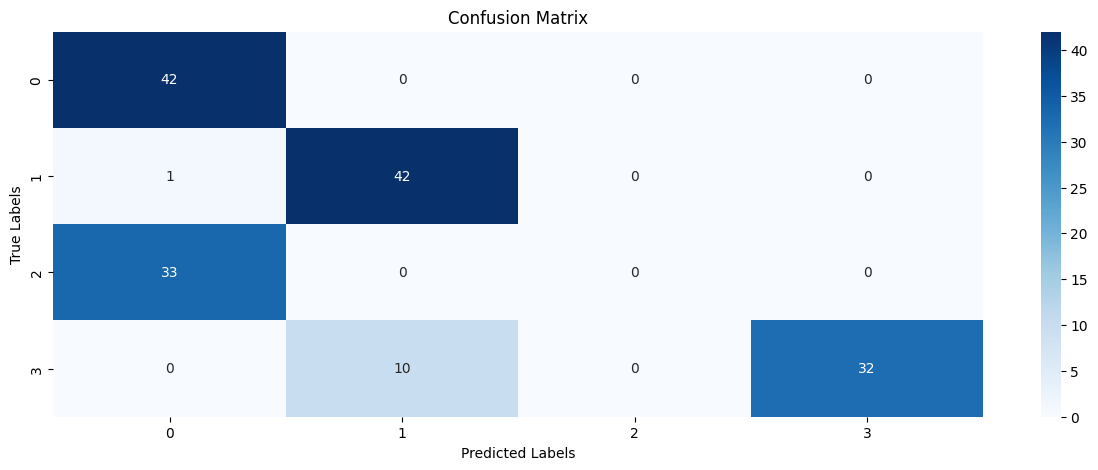

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns


cm1 = confusion_matrix(test_labels_onehot, y_hat)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))

sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')

plt.show()

In [40]:
mlp2 = MLP(hidden_layer_sizes=[16,12], hidden_activation='relu', output_size=4, output_activation='sigmoid', n_iter=2000, loss_fn=mse, eta=0.06, random_state=4)

In [41]:
train_labels_onehot = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()
validate_labels_onehot = encoder.fit_transform(y_valid.reshape(-1, 1)).toarray()

Train Loss: 0.3153 | Train Acc: 2.6583 | Val Loss: 0.2380 | Val Acc: 2.9062
Train Loss: 0.2372 | Train Acc: 2.9104 | Val Loss: 0.1426 | Val Acc: 3.3625
Train Loss: 0.1422 | Train Acc: 3.3563 | Val Loss: 0.1322 | Val Acc: 3.3563
Train Loss: 0.1391 | Train Acc: 3.3229 | Val Loss: 0.1242 | Val Acc: 3.4188
Train Loss: 0.1229 | Train Acc: 3.4083 | Val Loss: 0.1117 | Val Acc: 3.4688
Train Loss: 0.1193 | Train Acc: 3.4271 | Val Loss: 0.1098 | Val Acc: 3.4750
Train Loss: 0.1068 | Train Acc: 3.4917 | Val Loss: 0.1019 | Val Acc: 3.5187
Train Loss: 0.1053 | Train Acc: 3.4917 | Val Loss: 0.0989 | Val Acc: 3.5375
Train Loss: 0.0955 | Train Acc: 3.5354 | Val Loss: 0.0953 | Val Acc: 3.5312
Train Loss: 0.0959 | Train Acc: 3.5167 | Val Loss: 0.0916 | Val Acc: 3.5500
Train Loss: 0.0879 | Train Acc: 3.5438 | Val Loss: 0.0895 | Val Acc: 3.5500
Train Loss: 0.0886 | Train Acc: 3.5312 | Val Loss: 0.0862 | Val Acc: 3.5562
Train Loss: 0.0819 | Train Acc: 3.5604 | Val Loss: 0.0847 | Val Acc: 3.5750
Train Loss: 

<ipython-input-34-d5044df48fde>:123: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))  # Sigmoid activation


Train Loss: 0.1559 | Train Acc: 3.3750 | Val Loss: 0.1281 | Val Acc: 3.4875
Train Loss: 0.1380 | Train Acc: 3.4479 | Val Loss: 0.1155 | Val Acc: 3.5375
Train Loss: 0.1180 | Train Acc: 3.5271 | Val Loss: 0.1250 | Val Acc: 3.5000
Train Loss: 0.1380 | Train Acc: 3.4479 | Val Loss: 0.2047 | Val Acc: 3.1812
Train Loss: 0.2078 | Train Acc: 3.1688 | Val Loss: 0.1281 | Val Acc: 3.4875
Train Loss: 0.1380 | Train Acc: 3.4479 | Val Loss: 0.1359 | Val Acc: 3.4562
Train Loss: 0.1630 | Train Acc: 3.3479 | Val Loss: 0.2328 | Val Acc: 3.0688
Train Loss: 0.2167 | Train Acc: 3.1333 | Val Loss: 0.1116 | Val Acc: 3.5500
Train Loss: 0.1490 | Train Acc: 3.4042 | Val Loss: 0.1314 | Val Acc: 3.4750
Train Loss: 0.1401 | Train Acc: 3.4396 | Val Loss: 0.2125 | Val Acc: 3.1500
Train Loss: 0.2099 | Train Acc: 3.1604 | Val Loss: 0.1266 | Val Acc: 3.4937
Train Loss: 0.1383 | Train Acc: 3.4458 | Val Loss: 0.1346 | Val Acc: 3.4625
Train Loss: 0.1517 | Train Acc: 3.3917 | Val Loss: 0.2078 | Val Acc: 3.1688
Train Loss: 

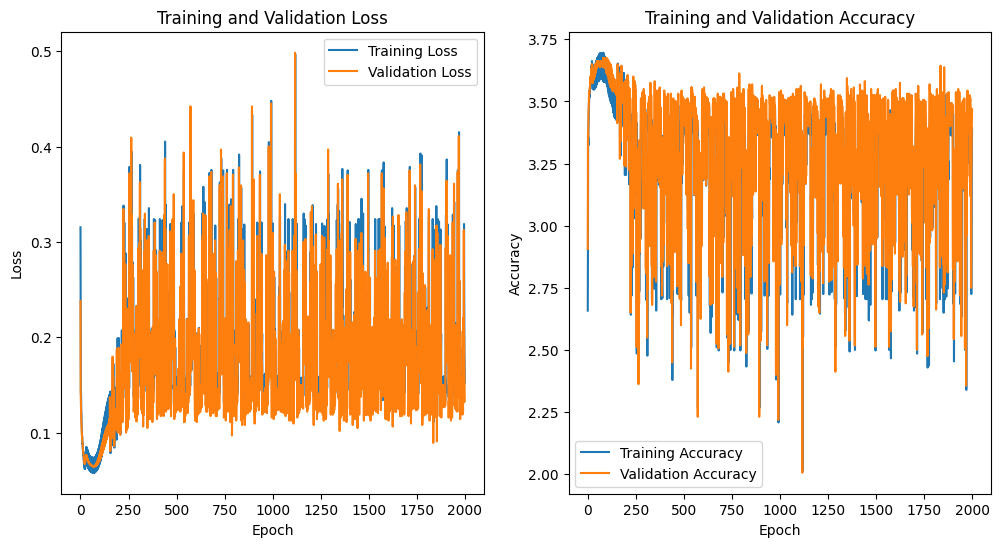

In [42]:
mlp2.fit(train_normalized_data, train_labels_onehot, valid_normalized_data, validate_labels_onehot)

In [43]:
y_hat = mlp.predict(test_normalized_data)
y_hat = np.argmax(y_hat, axis=1)
# test_labels_onehot = np.argmax(test_labels_onehot, axis=1)
model_report = classification_report(test_labels_onehot, y_hat)
print(model_report)

              precision    recall  f1-score   support

           0       0.55      1.00      0.71        42
           1       0.81      0.98      0.88        43
           2       0.00      0.00      0.00        33
           3       1.00      0.76      0.86        42

    accuracy                           0.73       160
   macro avg       0.59      0.68      0.62       160
weighted avg       0.62      0.72      0.65       160



<ipython-input-34-d5044df48fde>:123: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))  # Sigmoid activation
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control t

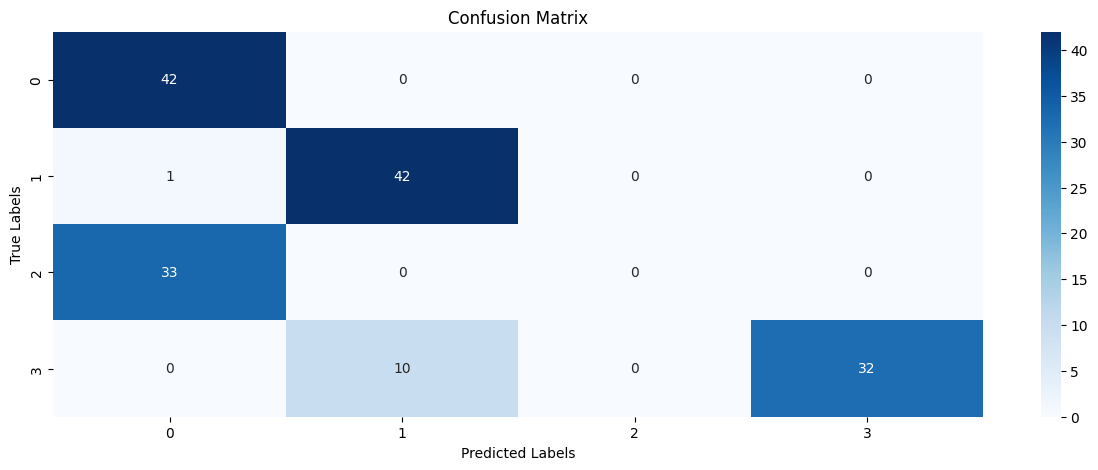

In [44]:
cm2 = confusion_matrix(test_labels_onehot, y_hat)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))

sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')

plt.show()

In [45]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(16, 12), random_state=4)
clf.fit(train_normalized_data, train_labels_onehot)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(16, 12), random_state=4,
              solver='lbfgs')

In [48]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, train_normalized_data, train_labels_onehot,
                         cv=5, n_jobs=1)
mean_accuracy = scores.mean()

print("Mean Accuracy:", mean_accuracy)

Mean Accuracy: 0.99375


In [49]:
y_hat = clf.predict(test_normalized_data)
y_hat = np.argmax(y_hat, axis=1)
# test_labels_onehot = np.argmax(test_labels_onehot, axis=1)
model_report = classification_report(test_labels_onehot, y_hat)
print(model_report)

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        42
           1       1.00      0.98      0.99        43
           2       1.00      1.00      1.00        33
           3       0.97      0.93      0.95        42

    accuracy                           0.97       160
   macro avg       0.98      0.98      0.98       160
weighted avg       0.98      0.97      0.97       160



<ipython-input-34-d5044df48fde>:11: RuntimeWarning: divide by zero encountered in log
  return np.mean(-(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)))
<ipython-input-34-d5044df48fde>:11: RuntimeWarning: invalid value encountered in multiply
  return np.mean(-(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)))


Train Loss: inf | Train Acc: 2.6266
Train Loss: nan | Train Acc: 2.8953
Train Loss: nan | Train Acc: 3.3531
Train Loss: nan | Train Acc: 3.3109
Train Loss: nan | Train Acc: 3.4047
Train Loss: nan | Train Acc: 3.4125
Train Loss: nan | Train Acc: 3.4734
Train Loss: nan | Train Acc: 3.4875
Train Loss: nan | Train Acc: 3.5219
Train Loss: nan | Train Acc: 3.5078
Train Loss: nan | Train Acc: 3.5609
Train Loss: nan | Train Acc: 3.5453
Train Loss: nan | Train Acc: 3.5672
Train Loss: nan | Train Acc: 3.5562
Train Loss: nan | Train Acc: 3.5828
Train Loss: nan | Train Acc: 3.5797
Train Loss: nan | Train Acc: 3.6016
Train Loss: nan | Train Acc: 3.5875
Train Loss: nan | Train Acc: 3.6219
Train Loss: nan | Train Acc: 3.5969
Train Loss: nan | Train Acc: 3.6422
Train Loss: nan | Train Acc: 3.6078
Train Loss: nan | Train Acc: 3.6172
Train Loss: nan | Train Acc: 3.5828
Train Loss: nan | Train Acc: 3.6094
Train Loss: nan | Train Acc: 3.5625
Train Loss: nan | Train Acc: 3.6078
Train Loss: nan | Train Acc:

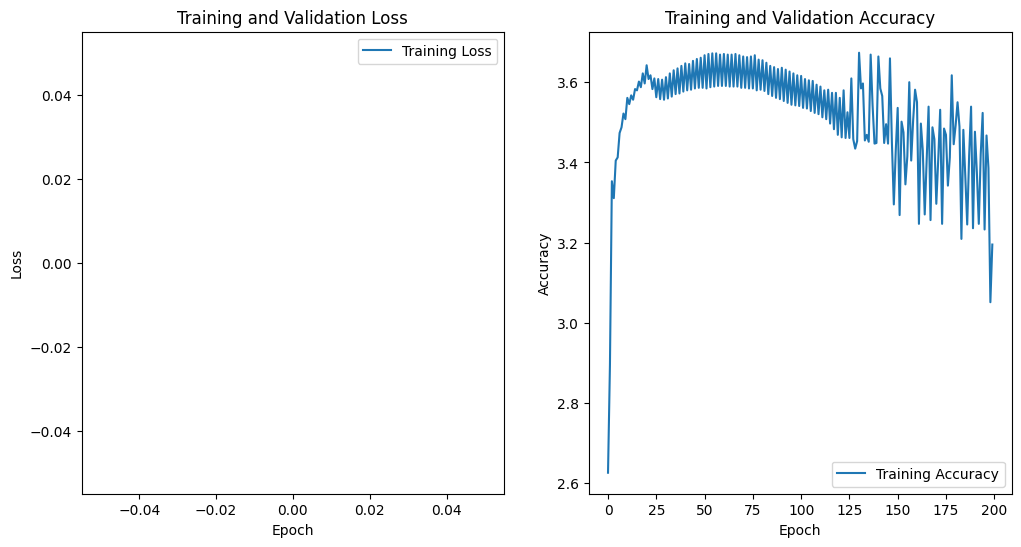

Fold 1 - Training Accuracy: 0.2469, Test Accuracy: 0.2812
Train Loss: inf | Train Acc: 2.5922
Train Loss: nan | Train Acc: 2.8781
Train Loss: nan | Train Acc: 3.3422
Train Loss: nan | Train Acc: 3.3031
Train Loss: nan | Train Acc: 3.3922
Train Loss: nan | Train Acc: 3.4406
Train Loss: nan | Train Acc: 3.4484
Train Loss: nan | Train Acc: 3.4891
Train Loss: nan | Train Acc: 3.5078
Train Loss: nan | Train Acc: 3.5234
Train Loss: nan | Train Acc: 3.5375
Train Loss: nan | Train Acc: 3.5359
Train Loss: nan | Train Acc: 3.5484
Train Loss: nan | Train Acc: 3.5344
Train Loss: nan | Train Acc: 3.5578
Train Loss: nan | Train Acc: 3.5469
Train Loss: nan | Train Acc: 3.5688
Train Loss: nan | Train Acc: 3.5641
Train Loss: nan | Train Acc: 3.5891
Train Loss: nan | Train Acc: 3.5828
Train Loss: nan | Train Acc: 3.6094
Train Loss: nan | Train Acc: 3.5812
Train Loss: nan | Train Acc: 3.5844
Train Loss: nan | Train Acc: 3.5609
Train Loss: nan | Train Acc: 3.5844
Train Loss: nan | Train Acc: 3.5531
Train 

<ipython-input-34-d5044df48fde>:123: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))  # Sigmoid activation


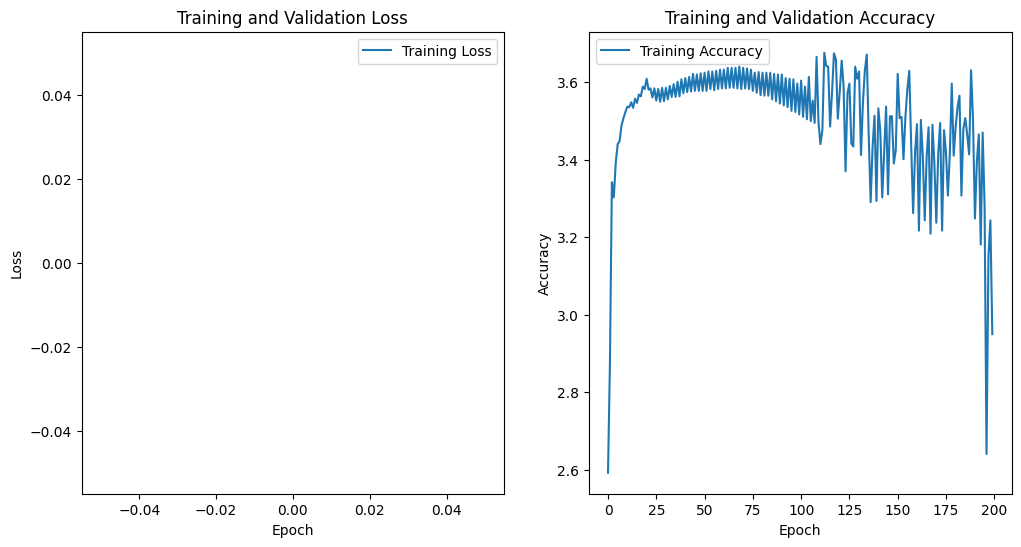

Fold 2 - Training Accuracy: 0.2500, Test Accuracy: 0.2625
Train Loss: inf | Train Acc: 2.5703
Train Loss: nan | Train Acc: 2.9062
Train Loss: nan | Train Acc: 3.3406
Train Loss: nan | Train Acc: 3.3078
Train Loss: nan | Train Acc: 3.4109
Train Loss: nan | Train Acc: 3.4266
Train Loss: nan | Train Acc: 3.4656
Train Loss: nan | Train Acc: 3.4828
Train Loss: nan | Train Acc: 3.5250
Train Loss: nan | Train Acc: 3.5266
Train Loss: nan | Train Acc: 3.5391
Train Loss: nan | Train Acc: 3.5547
Train Loss: nan | Train Acc: 3.5578
Train Loss: nan | Train Acc: 3.5656
Train Loss: nan | Train Acc: 3.5688
Train Loss: nan | Train Acc: 3.5734
Train Loss: nan | Train Acc: 3.5859
Train Loss: nan | Train Acc: 3.5891
Train Loss: nan | Train Acc: 3.5984
Train Loss: nan | Train Acc: 3.5969
Train Loss: nan | Train Acc: 3.6063
Train Loss: nan | Train Acc: 3.5969
Train Loss: nan | Train Acc: 3.5969
Train Loss: nan | Train Acc: 3.5734
Train Loss: nan | Train Acc: 3.5781
Train Loss: nan | Train Acc: 3.5688
Train 

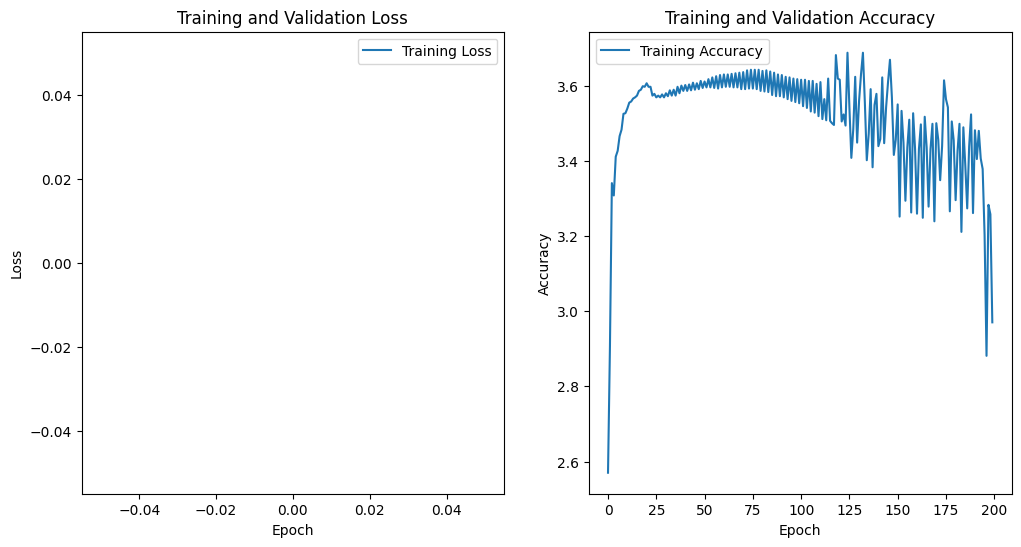

Fold 3 - Training Accuracy: 0.2500, Test Accuracy: 0.2812
Train Loss: inf | Train Acc: 2.5703
Train Loss: nan | Train Acc: 2.8859
Train Loss: nan | Train Acc: 3.3641
Train Loss: nan | Train Acc: 3.3109
Train Loss: nan | Train Acc: 3.4250
Train Loss: nan | Train Acc: 3.4406
Train Loss: nan | Train Acc: 3.4719
Train Loss: nan | Train Acc: 3.5000
Train Loss: nan | Train Acc: 3.5000
Train Loss: nan | Train Acc: 3.5250
Train Loss: nan | Train Acc: 3.5328
Train Loss: nan | Train Acc: 3.5484
Train Loss: nan | Train Acc: 3.5500
Train Loss: nan | Train Acc: 3.5531
Train Loss: nan | Train Acc: 3.5547
Train Loss: nan | Train Acc: 3.5609
Train Loss: nan | Train Acc: 3.5797
Train Loss: nan | Train Acc: 3.5828
Train Loss: nan | Train Acc: 3.5859
Train Loss: nan | Train Acc: 3.5969
Train Loss: nan | Train Acc: 3.5906
Train Loss: nan | Train Acc: 3.6063
Train Loss: nan | Train Acc: 3.5812
Train Loss: nan | Train Acc: 3.5812
Train Loss: nan | Train Acc: 3.5750
Train Loss: nan | Train Acc: 3.5812
Train 

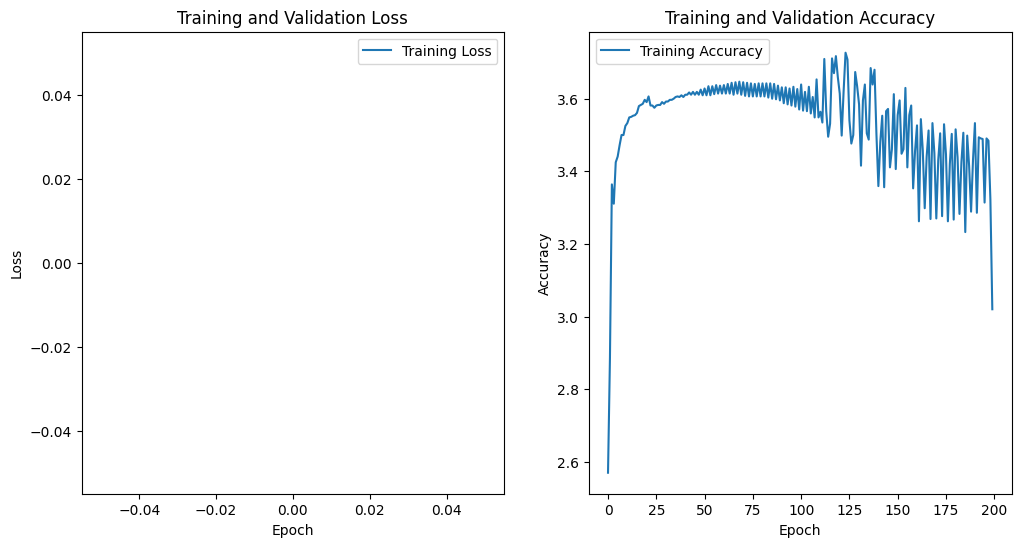

Fold 4 - Training Accuracy: 0.2922, Test Accuracy: 0.2750
Train Loss: inf | Train Acc: 2.5656
Train Loss: nan | Train Acc: 2.8719
Train Loss: nan | Train Acc: 3.3641
Train Loss: nan | Train Acc: 3.3312
Train Loss: nan | Train Acc: 3.4438
Train Loss: nan | Train Acc: 3.4781
Train Loss: nan | Train Acc: 3.4906
Train Loss: nan | Train Acc: 3.5203
Train Loss: nan | Train Acc: 3.5453
Train Loss: nan | Train Acc: 3.5547
Train Loss: nan | Train Acc: 3.5656
Train Loss: nan | Train Acc: 3.5672
Train Loss: nan | Train Acc: 3.5828
Train Loss: nan | Train Acc: 3.5906
Train Loss: nan | Train Acc: 3.5938
Train Loss: nan | Train Acc: 3.6094
Train Loss: nan | Train Acc: 3.6094
Train Loss: nan | Train Acc: 3.6234
Train Loss: nan | Train Acc: 3.6203
Train Loss: nan | Train Acc: 3.6375
Train Loss: nan | Train Acc: 3.6453
Train Loss: nan | Train Acc: 3.6484
Train Loss: nan | Train Acc: 3.6609
Train Loss: nan | Train Acc: 3.6578
Train Loss: nan | Train Acc: 3.6500
Train Loss: nan | Train Acc: 3.6437
Train 

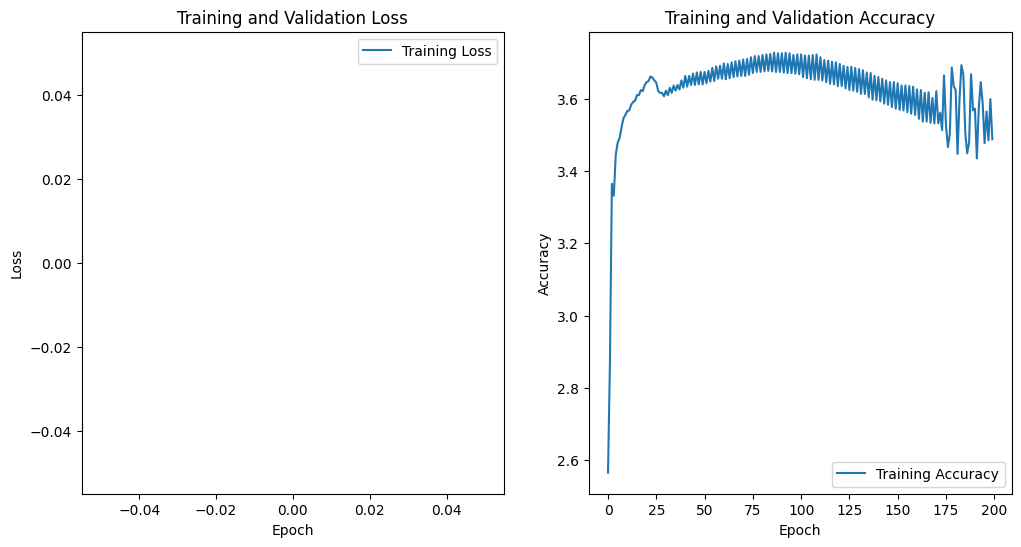

Fold 5 - Training Accuracy: 0.2922, Test Accuracy: 0.2125
Average Training Accuracy: 0.2662
Average Test Accuracy: 0.2625


In [52]:

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

# Assuming MLP class and other utility functions (relu, sigmoid, etc.) are already defined as provided

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode the labels
# encoder = OneHotEncoder()
# y = y.to_numpy()
# y_onehot = encoder.fit_transform(y.reshape(-1, 1)).toarray()
# One-hot encode the labels
encoder = OneHotEncoder()
y = y.to_numpy()
y_onehot = encoder.fit_transform(y.reshape(-1, 1)).toarray()

# Define the model parameters
hidden_layer_sizes = [16, 12]
hidden_activation = 'relu'
output_size = y_onehot.shape[1]  # Number of classes
output_activation = 'sigmoid'
n_iter = 200
loss_fn = bce
eta = 0.06
random_state = 4

# Initialize K-Fold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=random_state)

# Lists to store performance metrics
train_accuracies = []
test_accuracies = []

for fold, (train_index, test_index) in enumerate(kf.split(X_scaled), 1):
    X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y_onehot[train_index], y_onehot[test_index]

    # Initialize the MLP model
    mlp_net = MLP(hidden_layer_sizes=hidden_layer_sizes, hidden_activation=hidden_activation,
                  output_size=output_size, output_activation=output_activation,
                  n_iter=n_iter, loss_fn=loss_fn, eta=eta, random_state=random_state)

    # Fit the model
    mlp_net.fit(X_train_fold, y_train_fold)

    # Evaluate on the training and test sets
    y_train_pred = mlp_net.predict(X_train_fold)
    y_test_pred = mlp_net.predict(X_test_fold)

    train_acc = accuracy(np.argmax(y_train_fold, axis=1), np.argmax(y_train_pred, axis=1))
    test_acc = accuracy(np.argmax(y_test_fold, axis=1), np.argmax(y_test_pred, axis=1))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"Fold {fold} - Training Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

# Average performance across all folds
avg_train_acc = np.mean(train_accuracies)
avg_test_acc = np.mean(test_accuracies)

print(f"Average Training Accuracy: {avg_train_acc:.4f}")
print(f"Average Test Accuracy: {avg_test_acc:.4f}")